# Instructions
This is the ipython notebook for creating visual interpretation of the results of the final experiment, which are stored in csv format.

# import necessary modules

In [61]:
import pandas as pd
import numpy as np
import csv
import tools as t
import matplotlib.pyplot as plt

# Loading necessary data, functions
You can optionally first run write to csv to ensure all available data is in the files. Then load the csv with appropriate paths.

## Data

In [71]:
t.write_results_to_csv()
csv_path_NN = "/home/s2025396/data1/resultsQRL/NEW/NN_experiment_data.csv"
csv_path_PQC = "/home/s2025396/data1/resultsQRL/NEW/PQC_experiment_data.csv"
df_PQC = pd.read_csv(csv_path_PQC)
df_NN = pd.read_csv(csv_path_NN)
df_NN[["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]] = df_NN[["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]].round(4)
df_PQC[["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]] = df_PQC[["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]].round(4)
# print(df_PQC[df_PQC["n_holes"]==6])
print(df_NN.columns)

0it [00:00, ?it/s]

Index(['environment', 'type', 'n_inputs', 'n_episodes', 'n_holes',
       'n_hidden_layers', 'n_nodes_per_layer', 'learning_rate', 'max_steps',
       'batch_size', 'number_of_parameters', 'n_reps', 'n_completed_runs',
       'best_performance', 'std_best_performance', 'mean_performance',
       'std_mean_performance', 'std_std_performance', 'best_policy',
       'best_policy_math_avg', 'n_achieved_best_policy'],
      dtype='object')


## Manually inputting optimal policies




In [72]:
columns = ["environment","n_holes", "performance", "policy", "min_memory"]
data_optimal = [
    ['fiah', 5, 2.9309, [1, 1, 3, 3, 1, 1, 3, 3, 1, 1], 2],
    ['fiah', 6, 3.3919, [1, 4, 4, 1, 2, 2, 4, 4, 1, 1], 4],
    ['fiah', 7, 4.0017, [1, 5, 2, 1, 5, 4, 1, 5, 3, 1], 3],
    ['fiah', 8, 4.4937, [6, 6, 3, 1, 1, 3, 6, 6, 3, 1], 2],
    ['givens-gx0.79-gy1.57', 5, 2.8325, [3, 0, 4, 0, 3, 0, 4, 2, 3, 0], 4],
    ['givens-gx0.79-gy1.57', 6, 3.3444, [0, 3, 5, 4, 4, 4, 0, 5, 3, 3], 3],
    ['givens-gx0.79-gy1.57', 7, 3.4164, [5, 0, 6, 6, 2, 2, 2, 6, 4, 1], 3],
    ['givens-gx0.79-gy1.57', 8, 3.7856, [1, 5, 0, 6, 6, 2, 7, 4, 2, 2], 2],
    ['givens-gx3.14-gy1.57', 5, 3.0000, [3, 3, 1, 1, 0, 0, 0, 0, 0, 0], 2],
    ['givens-gx3.14-gy1.57', 6, 3.5000, [5, 3, 3, 1, 1, 0, 0, 0, 0, 0], 2],
    ['givens-gx3.14-gy1.57', 7, 4.0000, [5, 5, 3, 3, 1, 1, 0, 0, 0, 0], 2],
    ['givens-gx3.14-gy1.57', 8, 4.5000, [7, 5, 5, 3, 3, 1, 1, 0, 0, 0], 2],
    ['givens-gy0.79-gx0.79', 5, 2.6472, [2, 1, 3, 3, 0, 3, 4, 0, 2, 2], 2],
    ['givens-gy0.79-gx0.79', 6, 2.8326, [1, 5, 2, 5, 0, 5, 0, 5, 3, 1], 4],
    ['givens-gy0.79-gx0.79', 7, 3.4658, [3, 5, 2, 5, 2, 5, 2, 1, 3, 5], 5],
    ['givens-gy0.79-gx0.79', 8, 3.5036, [4, 7, 4, 1, 7, 2, 7, 1, 7, 3], 3]

]

df_optimal = pd.DataFrame(data = data_optimal, columns = columns )
df_optimal.head()

,environment,n_holes,performance,policy,min_memory
0,fiah,5,2.9309,"[1, 1, 3, 3, 1, 1, 3, 3, 1, 1]",2
1,fiah,6,3.3919,"[1, 4, 4, 1, 2, 2, 4, 4, 1, 1]",4
2,fiah,7,4.0017,"[1, 5, 2, 1, 5, 4, 1, 5, 3, 1]",3
3,fiah,8,4.4937,"[6, 6, 3, 1, 1, 3, 6, 6, 3, 1]",2
4,givens-gx0.79-gy1.57,5,2.8325,"[3, 0, 4, 0, 3, 0, 4, 2, 3, 0]",4


## Load used functions

In [73]:
def select_data(df_NN, df_PQC, env_name = None, n_holes= None, lr = None, n_eps = None):
    data_NN = df_NN
    data_PQC = df_PQC

    if env_name is not None:
        data_NN = data_NN[data_NN["environment"]== env_name]
        data_PQC = data_PQC[data_PQC["environment"]== env_name]
    
    if n_holes is not None:
        data_NN = data_NN[data_NN["n_holes"]== n_holes]
        data_PQC = data_PQC[data_PQC["n_holes"]== n_holes]

    if lr is not None:
        data_NN = data_NN[data_NN["learning_rate"]==lr]
        data_PQC = data_PQC[data_PQC["learning_rate"]==lr]

    if n_eps is not None:
        data_NN = data_NN[data_NN["n_episodes"]==n_eps]
        data_PQC = data_PQC[data_PQC["n_episodes"]==n_eps]
    
    return data_NN, data_PQC


## Check dataframe for uneven entries

### NN

In [74]:
df_NN[df_NN["environment"] == "fiah"].head()
print(len(df_NN))
for lr in [0.1, 0.01, 0.001]:
    for n_eps in [2500, 11600, 53860, 250000]:
        mask = df_NN[df_NN["learning_rate"]==lr][df_NN["n_episodes"]==n_eps]
        print(f"for lr {lr} and {n_eps} eps, there are {len(mask)} models")
# print((df_NN))
# print(len(df_NN[df_NN["environment"]=='fiah']))
# print(len(df_NN[df_NN["environment"]=='givens-gx3.14-gy1.57']))
# print(len(df_NN[df_NN["environment"]=='givens-gx0.79-gy1.57']))

1152
for lr 0.1 and 2500 eps, there are 96 models
for lr 0.1 and 11600 eps, there are 96 models
for lr 0.1 and 53860 eps, there are 96 models
for lr 0.1 and 250000 eps, there are 96 models
for lr 0.01 and 2500 eps, there are 96 models
for lr 0.01 and 11600 eps, there are 96 models
for lr 0.01 and 53860 eps, there are 96 models
for lr 0.01 and 250000 eps, there are 96 models
for lr 0.001 and 2500 eps, there are 96 models
for lr 0.001 and 11600 eps, there are 96 models
for lr 0.001 and 53860 eps, there are 96 models
for lr 0.001 and 250000 eps, there are 96 models


/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/s2025396/vscode/lib64/python3.6/site-pac

### PQC

In [75]:
df_PQC.head()
print(len(df_PQC["max_steps"]))
for lr in [0.1, 0.01, 0.001]:
    for n_eps in [2500, 11600, 53860, 250000]:
        mask = df_PQC[df_PQC["learning_rate"]==lr][df_PQC["n_episodes"]==n_eps]
        print(f"for lr {lr} and {n_eps} eps, there are {len(mask)} models")

1787
for lr 0.1 and 2500 eps, there are 157 models
for lr 0.1 and 11600 eps, there are 157 models
for lr 0.1 and 53860 eps, there are 156 models
for lr 0.1 and 250000 eps, there are 147 models
for lr 0.01 and 2500 eps, there are 147 models
for lr 0.01 and 11600 eps, there are 147 models
for lr 0.01 and 53860 eps, there are 147 models
for lr 0.01 and 250000 eps, there are 146 models
for lr 0.001 and 2500 eps, there are 145 models
for lr 0.001 and 11600 eps, there are 146 models
for lr 0.001 and 53860 eps, there are 146 models
for lr 0.001 and 250000 eps, there are 146 models


/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/s2025396/vscode/lib64/python3.6/site-pac

### selection of accidental double runs

In [76]:
# mask = df_PQC[df_PQC["learning_rate"]==0.01][df_PQC["n_episodes"]==11600][df_PQC["environment"]=="fiah"][df_PQC["n_layers"]==5]
# print(mask)
# # a = np.random.choice([77,163])
# # print(a)
# # df_PQC.drop(index = a, inplace= True)


# Data Analysis

## Performance as function of amount of parameters

/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


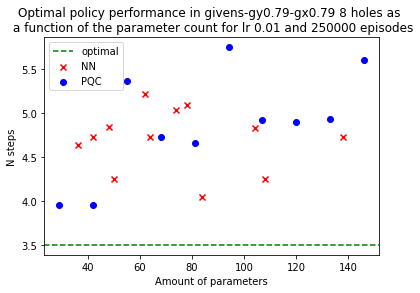

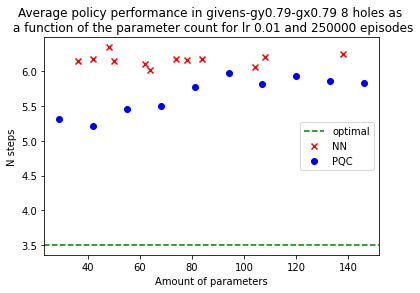

In [77]:
def plot_best_performance_and_mean_per_params(df_NN, df_PQC, env_name, n_holes, lr = None, n_eps = None, optimal_performance = None):

    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes, lr, n_eps)

    avg_best_performances_NN = []
    avg_mean_performances_NN = []

    avg_best_performances_PQC = []
    avg_mean_performances_PQC = []

    different_parameter_counts_NN = np.unique(data_NN["number_of_parameters"])
    different_parameter_counts_PQC = np.unique(data_PQC["number_of_parameters"])


    for n_params in different_parameter_counts_NN:
        data = data_NN[data_NN["number_of_parameters"]==n_params]
        # print(data["best_policy_math_avg"])
        avg_best_performance = np.mean(data["best_policy_math_avg"])
        avg_best_performances_NN.append(avg_best_performance)

        avg_mean_performance = np.mean(data["mean_performance"])
        avg_mean_performances_NN.append(avg_mean_performance)

    for n_params in different_parameter_counts_PQC:
        data = data_PQC[data_PQC["number_of_parameters"]==n_params]
        avg_best_performance = np.mean(data["best_policy_math_avg"])
        avg_best_performances_PQC.append(avg_best_performance)

        avg_mean_performance = np.mean(data["mean_performance"])
        avg_mean_performances_PQC.append(avg_mean_performance)

    plt.scatter(different_parameter_counts_NN, avg_best_performances_NN, marker= "x", color = "r", label = "NN")
    plt.scatter(different_parameter_counts_PQC, avg_best_performances_PQC, marker= "o", color = "b", label = "PQC")

    if optimal_performance is not None:
        plt.axhline(y = optimal_performance, linestyle = "dashed", color = 'g', label = "optimal")

    plt.xlabel("Amount of parameters")
    plt.ylabel("N steps")
    plt.title(f"Optimal policy performance in {env_name} {n_holes} holes as \n a function of the parameter count for lr {lr} and {n_eps} episodes")
    plt.legend()
    plt.show()

    plt.scatter(different_parameter_counts_NN, avg_mean_performances_NN, marker= "x", color = "r", label = "NN")
    plt.scatter(different_parameter_counts_PQC, avg_mean_performances_PQC, marker= "o", color = "b", label = "PQC")

    if optimal_performance is not None:
        plt.axhline(y = optimal_performance, linestyle = "dashed", color = 'g', label = "optimal")

    plt.xlabel("Amount of parameters")
    plt.ylabel("N steps")
    plt.title(f"Average policy performance in {env_name} {n_holes} holes as \n a function of the parameter count for lr {lr} and {n_eps} episodes")
    plt.legend()
    plt.show()

    pass

# eerste resultaten:

# set 1
env_name = "givens-gy0.79-gx0.79"
lr = 0.01
n_eps = 250000
n_holes = 8


plot_best_performance_and_mean_per_params(df_NN, df_PQC, env_name, n_holes, lr, n_eps, optimal_performance= df_optimal[df_optimal["environment"]==env_name][df_optimal["n_holes"]==n_holes]["performance"].values[0])

## Performance distribution

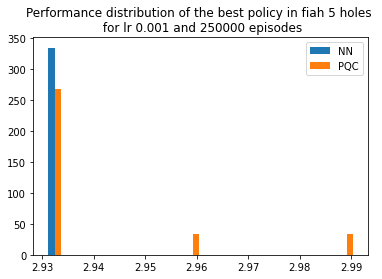

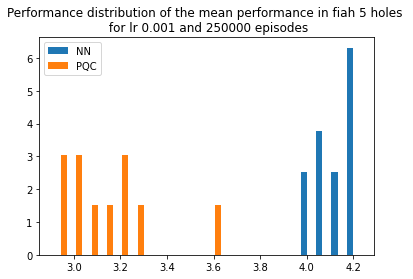

In [78]:
def performance_distribution(df_NN, df_PQC, env_name= None, n_holes= None, lr = None, n_eps = None, bins = 100, optimal_performance = None):

    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes, lr, n_eps)

    best_policy_math_avg_NN = data_NN["best_policy_math_avg"]
    best_policy_math_avg_PQC = data_PQC["best_policy_math_avg"]
    plt.hist([best_policy_math_avg_NN, best_policy_math_avg_PQC], bins = bins, density= True, label= ["NN", "PQC"])
    plt.title(f"Performance distribution of the best policy in {env_name} {n_holes} holes \n for lr {lr} and {n_eps} episodes")
    # if optimal_performance is not None:
    #     plt.xticks(list(range(10))+ [optimal_performance])

    plt.legend()
    plt.show()

    mean_performances_NN = data_NN["mean_performance"]
    mean_performances_PQC = data_PQC["mean_performance"]

    # if optimal_performance is not None:
    #     plt.xticks([optimal_performance], ["optimal"])

    plt.hist([mean_performances_NN, mean_performances_PQC], bins = bins, density= True, label= ["NN", "PQC"])
    plt.title(f"Performance distribution of the mean performance in {env_name} {n_holes} holes \n for lr {lr} and {n_eps} episodes")
    plt.legend()
    plt.show()
    # avg_hist_NN = data_NN.hist(column = "mean_performance", bins= bins)
    # avg_hist_PQC = data_PQC.hist(column = "mean_performance", bins= bins)

    pass

env_name = 'fiah'
n_holes = 5
lr = 0.001
n_eps = 250000

performance_distribution(df_NN, df_PQC, env_name, n_holes, lr, n_eps, bins = 20)

## Convergence ratio

In [82]:
def convergence_ratios(df_NN, df_PQC, env_name, n_holes, lr = None, n_eps = None, optimal_performance= None):
    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes, lr, n_eps)
    n_entries_NN = len(data_NN)
    n_entries_PQC = len(data_PQC)

    converged_NNs = data_NN[data_NN["best_policy_math_avg"]==optimal_performance]
    converged_PQCs = data_PQC[data_PQC["best_policy_math_avg"]==optimal_performance]

    ratio_at_leat_1_converged_NN = len(converged_NNs)/n_entries_NN
    ratio_at_leat_1_converged_PQC = len(converged_PQCs)/n_entries_PQC

    # "n_achieved_best_policy" is out of 10, so for full ratio need to take this into account
    total_models_converged_NN = np.sum(converged_NNs["n_achieved_best_policy"])
    total_models_converged_PQC = np.sum(converged_PQCs["n_achieved_best_policy"])

    convergence_ratio_NNs = total_models_converged_NN/(n_entries_NN*10)
    convergence_ratio_PQCs = total_models_converged_PQC/(n_entries_PQC*10)

    print("The ratio of models where at least 1 of the runs achieved the optimal policy was:\n NNs: {}, PQCs: {}.".format(
        ratio_at_leat_1_converged_NN, ratio_at_leat_1_converged_PQC
    ))
    print("The total convergence ratios are:\n NNs: {}, PQCs: {}.".format(
        convergence_ratio_NNs, convergence_ratio_PQCs
    ))

    pass

env_name = 'fiah'
n_holes = 5
lr = 0.1
n_eps = 250000
optimal_performance = df_optimal[df_optimal["environment"]==env_name][df_optimal["n_holes"]==n_holes]["performance"].values[0]

convergence_ratios(df_NN, df_PQC, env_name, n_holes, lr, n_eps, df_optimal[df_optimal["environment"]==env_name][df_optimal["n_holes"]==n_holes]["performance"].values[0])


The ratio of models where at least 1 of the runs achieved the optimal policy was:
 NNs: 0.0, PQCs: 1.0.
The total convergence ratios are:
 NNs: 0.0, PQCs: 0.49.


/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


## Training instability
Analysing the ratio of runs that return nans


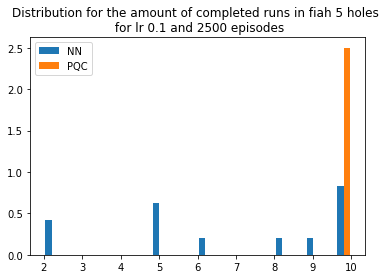

The ratio of completed runs for fiah 5 holes with lr 0.1 neps 2500 was: 
 NN: 0.6833333333333333, PQC: 1.0.


In [88]:
def completed_runs(df_NN, df_PQC, env_name=None, n_holes=None, lr = None, n_eps = None, bins = 100, plot_hist= True):
    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes, lr, n_eps)

    n_completed_runs_NN = data_NN["n_completed_runs"].fillna(0)
    n_completed_runs_PQC  = data_PQC["n_completed_runs"].fillna(0)

    if plot_hist:
        plt.hist([n_completed_runs_NN, n_completed_runs_PQC], bins = bins, density= True, label= ["NN", "PQC"])
        plt.title(f"Distribution for the amount of completed runs in {env_name} {n_holes} holes \n for lr {lr} and {n_eps} episodes")
        plt.legend()
        plt.show()
    
    
    print("The ratio of completed runs for {} {} holes with lr {} neps {} was: \n NN: {}, PQC: {}.".format(
        env_name, n_holes, lr, n_eps, (np.sum(n_completed_runs_NN)/(len(n_completed_runs_NN)*10)), 
        (np.sum(n_completed_runs_PQC)/(len(n_completed_runs_PQC)*10))
    ))

env_name = 'fiah'
n_holes = 5
lr = 0.1
n_eps = 250000
completed_runs(df_NN, df_PQC, "fiah", 5, 0.1, 2500, 20)

## Create table from results


In [105]:
def write_best_to_table(df_NN, df_PQC, env_name=None, n_holes=None, print_latex = False):
    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes)

    all_data = pd.concat([data_NN, data_PQC], ignore_index= True, sort= False)

    env_names = np.unique(data_NN["environment"])
    hole_nrs = np.unique(data_NN["n_holes"])


    table_data = []

    for env in env_names:
        for hole_nr in hole_nrs:

            relevant_data = all_data[all_data["environment"]==env][all_data["n_holes"]==hole_nr]
            best_performance = np.nanmin(relevant_data['best_policy_math_avg'])
            relevant_data = relevant_data[relevant_data["best_policy_math_avg"]==best_performance]
            min_params = np.min(relevant_data['number_of_parameters'])
            relevant_data = relevant_data[relevant_data['number_of_parameters']==min_params]
            min_eps = np.min(relevant_data['n_episodes'])
            relevant_data = relevant_data[relevant_data['n_episodes']==min_eps]
            # print(relevant_data)
            min_lr_arg = np.argmin(relevant_data['learning_rate'])
            # print(min_lr_arg)
            relevant_data = relevant_data.iloc[min_lr_arg]
            min_lr = relevant_data['learning_rate']
            type = relevant_data['type']
            policy = relevant_data['best_policy']
            row = [env, hole_nr, type, min_params, min_eps, min_lr, best_performance, policy]
            table_data.append(row)

    
    results= pd.DataFrame(data = table_data, columns = ['environment', 'n holes', 'type', 'n parameters', 'n episodes', 'learning rate', 'performance', 'policy'])
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(results)

    if print_latex:
        results.style.to_latex()
    
    pass

def write_specific_to_table(df_NN, df_PQC, env_name=None, n_holes=None, lr = None, n_episodes = None, print_latex = False):
    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes)

    all_data = pd.concat([data_NN, data_PQC], ignore_index= True, sort= False)

    env_names = np.unique(data_NN["environment"])
    hole_nrs = np.unique(data_NN["n_holes"])


    table_data = []

    for env in env_names:
        for hole_nr in hole_nrs:

            relevant_data = all_data[all_data["environment"]==env][all_data["n_holes"]==hole_nr]
            best_performance = np.nanmin(relevant_data['best_policy_math_avg'])
            relevant_data = relevant_data[relevant_data["best_policy_math_avg"]==best_performance]
            min_params = np.min(relevant_data['number_of_parameters'])
            relevant_data = relevant_data[relevant_data['number_of_parameters']==min_params]
            min_eps = np.min(relevant_data['n_episodes'])
            relevant_data = relevant_data[relevant_data['n_episodes']==min_eps]
            # print(relevant_data)
            min_lr_arg = np.argmin(relevant_data['learning_rate'])
            # print(min_lr_arg)
            relevant_data = relevant_data.iloc[min_lr_arg]
            min_lr = relevant_data['learning_rate']
            type = relevant_data['type']
            policy = relevant_data['best_policy']
            row = [env, hole_nr, type, min_params, min_eps, min_lr, best_performance, policy]
            table_data.append(row)

    
    results= pd.DataFrame(data = table_data, columns = ['environment', 'n holes', 'type', 'n parameters', 'n episodes', 'learning rate', 'performance', 'policy'])
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(results)
    
    if print_latex:
        results.style.to_latex()

    pass

write_best_to_table(df_NN, df_PQC, print_latex= False)

            environment  n holes type  n parameters  n episodes  \
0                  fiah        5  PQC            20        2500   
1                  fiah        8   NN            64      250000   
2  givens-gx0.79-gy1.57        5  PQC            40      250000   
3  givens-gx0.79-gy1.57        8   NN           138      250000   
4  givens-gx3.14-gy1.57        5  PQC            20        2500   
5  givens-gx3.14-gy1.57        8   NN            36       53860   
6  givens-gy0.79-gx0.79        5   NN            89       11600   
7  givens-gy0.79-gx0.79        8  PQC            29      250000   

   learning rate  performance                 policy  
0          0.100       2.9309  [1 1 3 3 1 1 3 3 1 1]  
1          0.001       4.4937  [6 6 3 1 1 3 6 6 3 1]  
2          0.001       2.8353  [3 0 4 0 3 0 4 0 3 0]  
3          0.001       3.9565  [3 0 1 6 6 1 1 6 6 1]  
4          0.100       3.0000  [0 4 4 2 2 2 2 2 2 2]  
5          0.010       4.5000  [6 6 2 2 0 4 4 7 7 0]  
6          

/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/s2025396/vscode/lib

## Writing back to CSV
Use the correct file path with index = False

In [20]:
# df_PQC.to_csv(path_or_buf= csv_path_PQC, index = False)